In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import random
import keras

df=pd.read_csv('/content/IHAR_Dataset.txt')


indice=list()

for i in df.index:
  indice.append(i)

df['num']=indice
bb=df.copy()


for i in df.index:
  if(df.iloc[i]['Activity']==4 or df.iloc[i]['Activity']==5 or df.iloc[i]['Activity']==6):
    if(random.randint(0,2)==1):
      bb.drop([i],axis=0,inplace=True)




labelb=list()


for i in bb['Activity'].values:
  if(i==4 or i==5 or i==6):
      labelb.append(4)
  else:
    if(i==1):
      labelb.append(1)
    elif(i==2):
      labelb.append(2)
    elif(i==3):
      labelb.append(3)

bb['Label']=labelb


For the purpose of sharing the code, this notebook uses a subset of the dataset that has only limited observations. 

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,fBodyGyro-min()-X,fBodyGyro-min()-Y,fBodyGyro-min()-Z,fBodyGyro-meanFreq()-X,fBodyGyro-meanFreq()-Y,fBodyGyro-meanFreq()-Z,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,num
0,0.288585,-0.020294,-0.132905,-0.997569,-0.984085,-0.994335,-0.257549,0.097947,0.547151,-0.841247,0.179941,-0.058627,5,0
1,0.278419,-0.016411,-0.123520,-0.986892,-0.999054,-0.994414,-0.048167,-0.401608,-0.068178,-0.844788,0.180289,-0.054317,5,1
2,0.279653,-0.019467,-0.113462,-0.988312,-0.997233,-0.993636,-0.216685,-0.017264,-0.110720,-0.848933,0.180637,-0.049118,5,2
3,0.279174,-0.026201,-0.123283,-0.989701,-0.994344,-0.993144,0.216862,-0.135245,-0.049728,-0.848649,0.181935,-0.047663,5,3
4,0.276629,-0.016570,-0.115362,-0.993738,-0.993725,-0.994835,-0.153343,-0.088403,-0.162230,-0.847865,0.185151,-0.043892,5,4


In [ ]:
bb.head(50)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,fBodyGyro-min()-X,fBodyGyro-min()-Y,fBodyGyro-min()-Z,fBodyGyro-meanFreq()-X,fBodyGyro-meanFreq()-Y,fBodyGyro-meanFreq()-Z,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,num,Label
1,0.278419,-0.016411,-0.123520,-0.986892,-0.999054,-0.994414,-0.048167,-0.401608,-0.068178,-0.844788,0.180289,-0.054317,5,1,4
2,0.279653,-0.019467,-0.113462,-0.988312,-0.997233,-0.993636,-0.216685,-0.017264,-0.110720,-0.848933,0.180637,-0.049118,5,2,4
3,0.279174,-0.026201,-0.123283,-0.989701,-0.994344,-0.993144,0.216862,-0.135245,-0.049728,-0.848649,0.181935,-0.047663,5,3,4
4,0.276629,-0.016570,-0.115362,-0.993738,-0.993725,-0.994835,-0.153343,-0.088403,-0.162230,-0.847865,0.185151,-0.043892,5,4,4
6,0.279454,-0.019641,-0.110022,-0.999974,-0.994401,-0.993306,-0.307125,-0.345672,-0.079246,-0.852150,0.182170,-0.043010,5,6,4
7,0.277432,-0.030488,-0.125360,-0.995803,-0.994881,-0.992967,-0.088136,-0.208115,-0.075989,-0.851017,0.183779,-0.041976,5,7,4
8,0.277293,-0.021751,-0.120751,-0.999400,-0.981550,-0.987055,-0.184055,0.176727,0.212800,-0.847971,0.188982,-0.037364,5,8,4
9,0.280586,-0.009960,-0.106065,-0.998789,-0.991271,-0.987507,-0.172768,-0.249085,-0.060978,-0.848294,0.190310,-0.034417,5,9,4
13,0.277175,-0.014713,-0.106756,-0.998957,-0.996580,-0.999093,0.269348,0.153874,0.155011,-0.849773,0.188812,-0.035063,5,13,4
15,0.279203,-0.023020,-0.122080,-0.997543,-0.972728,-0.946452,-0.298133,-0.301921,-0.207959,-0.761101,0.263119,0.024172,5,15,4


In [ ]:
l=pd.get_dummies(bb['Label'])
udf=bb.join(l)

In [ ]:
udf.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,fBodyGyro-min()-X,fBodyGyro-min()-Y,fBodyGyro-min()-Z,fBodyGyro-meanFreq()-X,fBodyGyro-meanFreq()-Y,fBodyGyro-meanFreq()-Z,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,num,Label,1,2,3,4
1,0.278419,-0.016411,-0.123520,-0.986892,-0.999054,-0.994414,-0.048167,-0.401608,-0.068178,-0.844788,0.180289,-0.054317,5,1,4,0,0,0,1
2,0.279653,-0.019467,-0.113462,-0.988312,-0.997233,-0.993636,-0.216685,-0.017264,-0.110720,-0.848933,0.180637,-0.049118,5,2,4,0,0,0,1
3,0.279174,-0.026201,-0.123283,-0.989701,-0.994344,-0.993144,0.216862,-0.135245,-0.049728,-0.848649,0.181935,-0.047663,5,3,4,0,0,0,1
4,0.276629,-0.016570,-0.115362,-0.993738,-0.993725,-0.994835,-0.153343,-0.088403,-0.162230,-0.847865,0.185151,-0.043892,5,4,4,0,0,0,1
6,0.279454,-0.019641,-0.110022,-0.999974,-0.994401,-0.993306,-0.307125,-0.345672,-0.079246,-0.852150,0.182170,-0.043010,5,6,4,0,0,0,1


In [ ]:
step=7 

i=0
pb=list()
kb=list()
actualb=list()
indb=list()
ac=list()

while i+step<bb.shape[0]:
    if(udf.iloc[i,12]==udf.iloc[i+step,12]):
        pb.append(udf.iloc[i:i+step,:-7].values)
        kb.append(udf.iloc[i,-4:].values)
        actualb.append(udf.iloc[i,14])
        indb.append(udf.iloc[i,13])
        ac.append(udf.iloc[i,12])
        i=i+1
    else:
        i=i+step
pb=np.array(pb).astype('float')
kb=np.array(kb).astype('float')

In [ ]:
upmodel=keras.models.load_model('/content/datarevised_uppercapsule(1,2,3).h5')
lowmodel=keras.models.load_model('/content/datarevised_lowercapsule(4,5,6).h5')

In [ ]:
import math 
spb=math.floor(0.80*len(pb))
print("SPB : ",spb)

SPB :  3160


In [ ]:
ytb=upmodel.predict([pb[spb:],pb[spb:]])
upmodel.evaluate([pb[spb:],pb[spb:]],ytb)

25/25 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 1.0000


[0.2612560987472534, 1.0]

In [ ]:
ylb=[np.argmax(i)+1 for i in ytb]
confb=confusion_matrix(actualb[spb:],ylb)

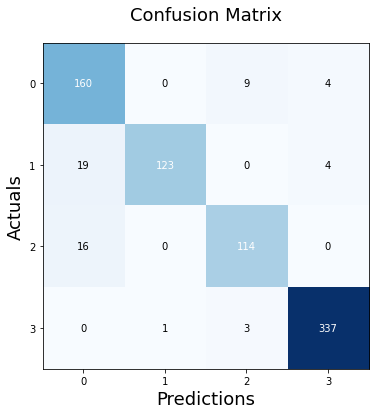

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confb, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("Number of Test Samples : ",len(pb)-spb)

Number of Test Samples :  790


1/1 [==============================] - 0s 18ms/step


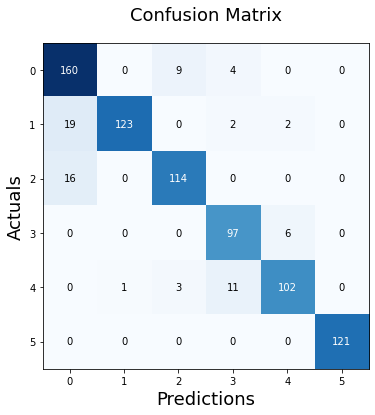

In [ ]:
matrix=[[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
#Actuals are rows indexed from 0 as 0,1,2,3,4,5
#Predicted are columns indexed from 0 as 0,1,2,3,4,5
lb=dict()
lc=dict()

lb[1]=1
lb[2]=2
lb[3]=3
lb[4]=4

lc[1]=4
lc[2]=5
lc[3]=6

for i in range(len(ylb)):
  z=lb[np.argmax(kb[spb+i])+1]#True value
  x=lb[ylb[i]] #predicted value
  if((z)==(x)): #If true value == predicted value and class not predicted as 4
    if(z!=4):
      matrix[z-1][z-1]=matrix[z-1][z-1]+1
    else:
      ip=lc[np.argmax(lowmodel.predict([pb[spb+i:spb+i+1],pb[spb+i:spb+i+1]]))+1]
      z=int(df.loc[df.num==indb[spb+i]]['Activity'])
      matrix[z-1][ip-1]=matrix[z-1][ip-1]+1
  elif((z)!=x):
    if(z!=4 and x!=4):
      matrix[z-1][x-1]=matrix[z-1][x-1]+1
    elif(z!=4 and x==4):
      ip=lc[np.argmax(lowmodel.predict([pb[spb+i:spb+i+1],pb[spb+i:spb+i+1]]))+1]
      matrix[z-1][ip-1]=matrix[z-1][ip-1]+1
    elif(z==4 and x!=4):
       z=int(df.loc[df.num==indb[spb+i]]['Activity'])
       matrix[z-1][x-1]=matrix[z-1][x-1]+1

fig, ax = plot_confusion_matrix(conf_mat=np.array(matrix), figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()